In [214]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import re

import seaborn

%matplotlib inline
plt.style.use('ggplot')

mpl.rcParams['figure.figsize'] = (12, 12)

In [215]:
#for fn in os.listdir('./data/kerneltestdata/uncleandata'):
#    with open('./data/kerneltestdata/uncleandata/'+fn, 'r') as fin:
#        data = fin.read().splitlines(True)
#    with open('./data/kerneltestdata/'+fn, 'w') as fout:
#        fout.writelines(data[1:])

In [216]:
bl = pd.read_csv('./data/kerneltestdata/bl2partv3.csv', sep = ',')
c128 = pd.read_csv('./data/kerneltestdata/sync128resultv3.csv', sep = ',')
c256 = pd.read_csv('./data/kerneltestdata/sync256resultv3.csv', sep = ',')
c384 = pd.read_csv('./data/kerneltestdata/sync384resultv3.csv', sep = ',')
c512 = pd.read_csv('./data/kerneltestdata/sync512resultv3.csv', sep = ',')
c768 = pd.read_csv('./data/kerneltestdata/sync768resultv3.csv', sep = ',')
#c896 = pd.read_csv('./data/kerneltestdata/result896.csv', sep = ',')
c896 = pd.read_csv('./data/kerneltestdata/sync896resultv3.csv', sep = ',')
c1024 = pd.read_csv('./data/kerneltestdata/sync1024resultv3.csv', sep = ',')

p1c128 = pd.read_csv('./data/kerneltestdata/1psync128result.csv', sep = ',')
p1c256 = pd.read_csv('./data/kerneltestdata/1psync256result.csv', sep = ',')
p1c384 = pd.read_csv('./data/kerneltestdata/1psync384result.csv', sep = ',')
p1c512 = pd.read_csv('./data/kerneltestdata/1psync512result.csv', sep = ',')
p1c768 = pd.read_csv('./data/kerneltestdata/1psync768result.csv', sep = ',')
p1c896 = pd.read_csv('./data/kerneltestdata/1psync896result.csv', sep = ',')
p1c1024 = pd.read_csv('./data/kerneltestdata/1psync1024result.csv', sep = ',')

nos128 = pd.read_csv('./data/kerneltestdata/nosync128resultv3.csv', sep = ',')
nos256 = pd.read_csv('./data/kerneltestdata/nosync256resultv3.csv', sep = ',')
nos384 = pd.read_csv('./data/kerneltestdata/nosync384resultv3.csv', sep = ',')
nos512 = pd.read_csv('./data/kerneltestdata/nosync512resultv3.csv', sep = ',')
nos768 = pd.read_csv('./data/kerneltestdata/nosync768resultv3.csv', sep = ',')
nos896 = pd.read_csv('./data/kerneltestdata/nosync896resultv3.csv', sep = ',')
nos1024 = pd.read_csv('./data/kerneltestdata/nosync1024resultv3.csv', sep = ',')

ss128 = pd.read_csv('./data/kerneltestdata/single128resultv3.csv', sep = ',')
ss256 = pd.read_csv('./data/kerneltestdata/single256resultv3.csv', sep = ',')
ss384 = pd.read_csv('./data/kerneltestdata/single384resultv3.csv', sep = ',')
ss512 = pd.read_csv('./data/kerneltestdata/single512resultv3.csv', sep = ',')
ss768 = pd.read_csv('./data/kerneltestdata/single768resultv3.csv', sep = ',')
ss896 = pd.read_csv('./data/kerneltestdata/single896resultv3.csv', sep = ',')
ss1024 = pd.read_csv('./data/kerneltestdata/single1024resultv3.csv', sep = ',')

In [217]:
frames1 = [c128,c256,c384,c512,c768,c896,c1024]
frames2 = [p1c128,p1c256,p1c384,p1c512,p1c768,p1c896,p1c1024]
frames3 = [nos128,nos256,nos384,nos512,nos768,nos896,nos1024]
frames4 = [ss128,ss256,ss384,ss512,ss768,ss896,ss1024]
dfsync = pd.concat(frames1, ignore_index=True)
dfp1 = pd.concat(frames2, ignore_index=True)
dfnosync = pd.concat(frames3, ignore_index=True)
dfsingle = pd.concat(frames4, ignore_index=True)
dfsync.columns = dfsync.columns.str.strip()
dfnosync.columns = dfnosync.columns.str.strip()
dfp1.columns = dfp1.columns.str.strip()
dfsingle.columns = dfsingle.columns.str.strip()

In [218]:
#dfsync[dfsync['#size']==1024]
#dfsingle[dfsingle['#size']==1024]


#dfp1.head()


In [219]:
dfsync['avgchunktime']=dfsync.HtDtime/dfsync['no_chunksHtD']
dfnosync['avgchunktime']=dfnosync.HtDtime/dfnosync['no_chunksHtD']
dfsingle['avgchunktime']=dfsingle.HtDtime/dfsingle['no_chunksHtD']
dfp1['avgchunktime']=dfp1.HtDtime/dfp1['no_chunksHtD']

dfsync['type']='synchronized streams'
dfnosync['type']='not synchronized streams'
dfsingle['type']='single stream'
dfp1['type']='single partition synched stream'

In [220]:
tempframes = [dfsync,dfnosync,dfp1,dfsingle]
dftemp=pd.concat(tempframes,ignore_index=True)
dftemp2 = dftemp.loc[dftemp['Kernel']=='partition 2']
dftemp2=dftemp2.append(dfp1)

In [221]:
#dftemp3['avgchunktimeDtH'].isnull()
#dftemp[(dftemp['type']=='single partition synched stream')]# & (dftemp['#size']==4096)]

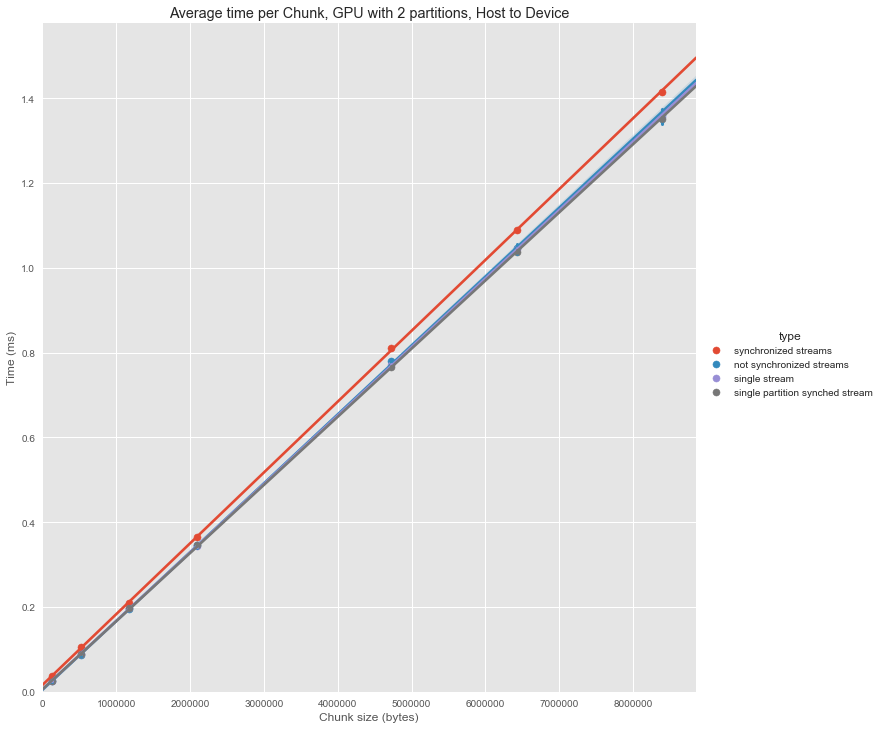

In [222]:


p=seaborn.lmplot(y='avgchunktime', x='chunksize',order=1,hue='type',data=dftemp2,size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)')
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions, Host to Device')
p.set(ylim=(0, None),xlim=(0,None))

In [223]:
dfsync['avgchunktimeDtH']=dfsync.DtHtime/(dfsync['no_chunksDtH']-1)
dfnosync['avgchunktimeDtH']=dfnosync.DtHtime/(dfnosync['no_chunksDtH']-1)
dfp1['avgchunktimeDtH']=dfp1.DtHtime/(dfp1['no_chunksDtH'])

dfsinglep1 = dfsingle.loc[dfsingle['Kernel']=='partition 1']
dfsinglep2 = dfsingle.loc[dfsingle['Kernel']=='partition 2']



dfsinglep1['avgchunktimeDtH']=dfsinglep1.DtHtime/(dfsinglep1['no_chunksDtH'])
dfsinglep2['avgchunktimeDtH']=dfsinglep2.DtHtime/(dfsinglep2['no_chunksDtH']-1)

dfsinglet=pd.concat([dfsinglep1,dfsinglep2],ignore_index=True)


tempframes = [dfsync,dfnosync,dfp1,dfsinglet]
dftemp3=pd.concat(tempframes,ignore_index=True)

#dftemp[(dftemp['type']=='single partition synched stream')]


/Users/erikmelander/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/erikmelander/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


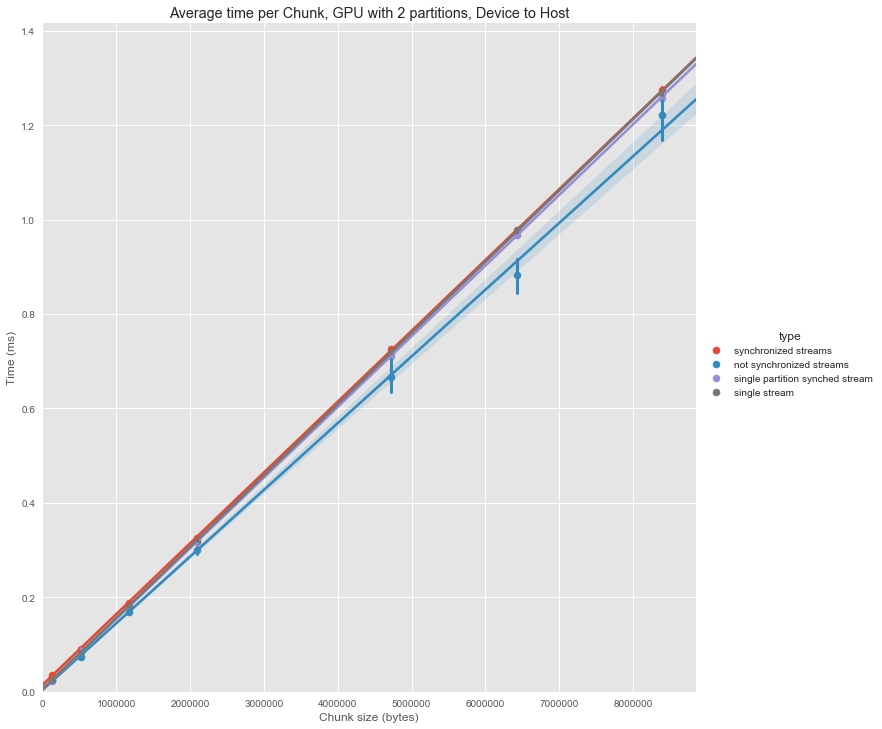

In [224]:

p=seaborn.lmplot(y='avgchunktimeDtH', x='chunksize',order=1,data=dftemp3,hue='type',size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)') 
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions, Device to Host')
p.set(ylim=(0, None),xlim=(0,None))

In [225]:
syncfit = dfsync.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(syncfit['chunksize'],syncfit['avgchunktime'],1)
fsync=np.poly1d(r)
rco = np.corrcoef(syncfit['chunksize'],syncfit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2
t = r[0]*2097152+r[1]
print t,t*96
#syncfit[(syncfit['#size']==2048)]

[  1.67201602e-07   1.54534177e-02] 0.999313664537
0.366100592337 35.1456568643


In [226]:
fit = dfsingle.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
fsingle=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2,fsingle

[  1.61586624e-07   5.27747312e-03] 0.999350775896  
1.616e-07 x + 0.005277


In [227]:
fit = dfp1.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
f1p = np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2

[  1.60780941e-07   4.54775632e-03] 0.999781755785


In [228]:
fit = dftemp3[dftemp3['type']=='single stream']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fsingleDtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fsingleDtH

fit = dftemp3[dftemp3['type']=='synchronized streams']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fsyncDtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fsyncDtH

fit = dftemp3[dftemp3['type']=='single partition synched stream']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fp1DtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fp1DtH
# dfsync['type']='synchronized streams'
# dfnosync['type']='not synchronized streams'
# dfsingle['type']='single stream'
# dfp1['type']='single partition synched stream'

[  1.51015407e-07   4.80240368e-03] 0.997368174557  
1.51e-07 x + 0.004802
[  1.50093494e-07   1.38427943e-02] 0.992597399676  
1.501e-07 x + 0.01384
[  1.49708667e-07   4.38860566e-03] 0.99759971786  
1.497e-07 x + 0.004389


In [229]:
result = sm.OLS(dftemp2['chunksize'],dftemp2['avgchunktime']).fit()
#result.summary()

In [230]:
dftemp3=dftemp2[dftemp2['chunksize']<1100000]

In [231]:
meanandstd = pd.DataFrame()
for f in tempframes:
    for cs in f.chunksize.unique():
        t = np.mean(f[f['chunksize']==cs])


In [232]:
avg128=np.mean(dftemp[dftemp['chunksize']==131072])
stderr128=np.std(dftemp[dftemp['chunksize']==131072])
var128=np.var(dftemp[dftemp['chunksize']==131072])

print avg128['avgchunktime']
print stderr128['avgchunktime']
print var128['avgchunktime']

0.0282242089593
0.0105275949275
0.000110830254958


In [233]:
avg1024=np.mean(dftemp[dftemp['chunksize']==8388608])
stderr1024=np.std(dftemp[dftemp['chunksize']==8388608])
var1024=np.var(dftemp[dftemp['chunksize']==8388608])


print avg1024['avgchunktime']
print stderr1024['avgchunktime']
print var1024['avgchunktime']



1.34240582248
0.0917394349659
0.00841612392785


Model
-----

In [277]:
#if P1 matrix is larger than p2
def memtransfersync(m,n,k,c):
    t1 = m*f1p(c)+(n-1)*fsync(c)
    t2 = m*f1p(c)+(n)*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransfersyncreturn(m,n,k,c):
    t1 = m*fp1DtH(c)+(n-1)*fsyncDtH(c)
    t2 = m*fp1DtH(c)+n*fsyncDtH(c)+(k)*fp1DtH(c)
    return (t1,t2)

def memtransferstream(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)+k*fsingle(c)
    return (t1,t2)

def memtransferstreamreturn(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n-1)*fsingleDtH(c)
    t2 = m*fsingleDtH(c)+n*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

In [272]:
mtest512 = pd.read_csv('./data/kerneltestdata/modeltest512_1536v3.csv', sep = ',')
mtest620 = pd.read_csv('./data/kerneltestdata/modeltest620_1860v3.csv', sep = ',')
mtest920 = pd.read_csv('./data/kerneltestdata/modeltest960_2880v3.csv', sep = ',')
mtest = pd.concat([mtest512,mtest620,mtest920])
mtest.columns = mtest.columns.str.strip()
mtestk1 = mtest[mtest['Kernel']=='partition 1']
mtestk1 = mtestk1[['chunksize','HtDtime']]
mtest620.head()






,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,1860,12869.712,0.814,77.764,79.840,3075200,83030400,27676800,54,18,partition 1,24.875521,46.635391,4.177600
1,1860,12869.712,0.814,77.764,79.840,3075200,83030400,27676800,54,18,partition 2,27.899649,46.645729,5.294176
2,1860,12869.712,0.521,77.858,79.933,3075200,83030400,27676800,54,18,partition 1,24.990305,46.623455,4.168768
3,1860,12869.712,0.521,77.858,79.933,3075200,83030400,27676800,54,18,partition 2,28.000160,46.644993,5.287488
4,1860,12869.712,0.536,77.903,79.977,3075200,83030400,27676800,54,18,partition 1,24.965183,46.665409,4.199296


(7.2355712393852336, 8.0692937259988504)
7.08269856 0.152872679385 2.11279350762
8.14256704 -0.0732733140012 -0.908051144118
(17.450974612916763, 19.52572434768615)
17.32027802 0.130696592917 0.748935780469
19.68495909 -0.159234742314 -0.815512600088
(25.269073288513159, 28.293611605329644)
25.02518949 0.243883798513 0.965147378887
28.30930136 -0.0156897546703 -0.0554533471697
(59.622255206213595, 66.820219991061919)
59.22210797 0.400147236214 0.671137371154
66.67391098 0.146309011062 0.218959187925


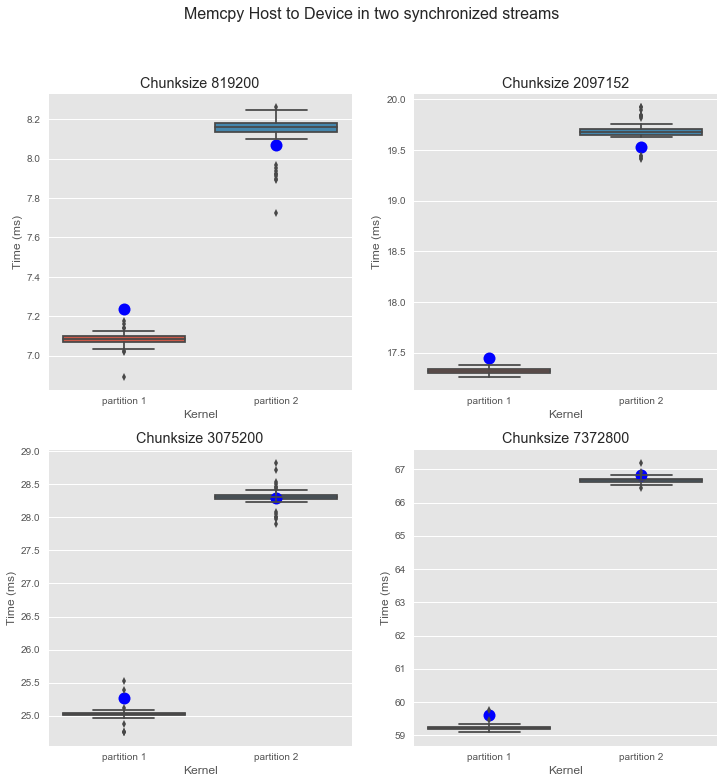

In [273]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,5,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100




plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1536v3.csv', sep = ',')
h = memtransfersync(5,44,5,2097152)
print h
mtest.columns = mtest.columns.str.strip()
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

mt=mtest
plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()



mt = mtest #[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,5,3075200)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersync(5,44,5,7372800)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
plt.suptitle('Memcpy Host to Device in two synchronized streams',fontsize=16)
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')
plt.title(title)

(1.4461765958822528, 2.345155654209985)
1.4164096 0.0297669958823 2.05832371835
2.29609376 0.04906189421 2.09205278643
(3.553160940709839, 5.7918752219137826)
3.51955232 0.0336086207098 0.945879493517
5.72776384 0.0641113819138 1.10691925253
(5.1656877214417687, 8.4297342179899761)
5.13723744 0.0284502814418 0.550754961894
8.38557792 0.04415629799 0.523816016592
(12.251224518075004, 20.020640616793564)
12.19869312 0.052531398075 0.428784877769
19.91949434 0.101146276794 0.505209991676


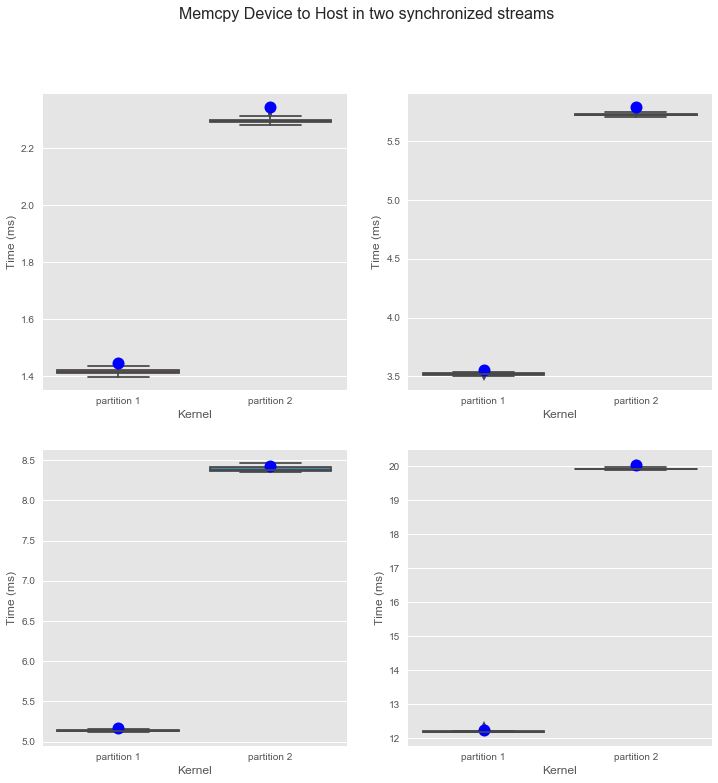

In [274]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncreturn(6,6,6,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest1536resultv5.csv', sep = ',')
h = memtransfersyncreturn(6,6,6,2097152)
print h
mtest.columns = mtest.columns.str.strip()
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

mt=mtest
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')


plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


h = memtransfersyncreturn(6,6,6,3075200)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

mt = mtest #[mtest['Kernel']=='partition 1']
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')



plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersyncreturn(6,6,6,7372800)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
plt.suptitle('Memcpy Device to Host in two synchronized streams',fontsize=16)
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')

(6.7448125243573891, 7.433058700312225)
6.87879232 -0.133979795643 -1.98641244896
7.42312 0.00993870031222 0.133709428553
(16.863310017361449, 18.584055937500374)
16.64553544 0.217774577361 1.29141062542
18.41460545 0.1694504875 0.911805733206
(24.607244246532527, 27.11818753699503)
24.45660001 0.150644236533 0.61219466521
27.15577297 -0.037585433005 -0.138598617454
(58.634543257711549, 64.617659916661708)
57.87869756 0.755845697712 1.28907919414
64.7468682 -0.129208283338 -0.199958159279


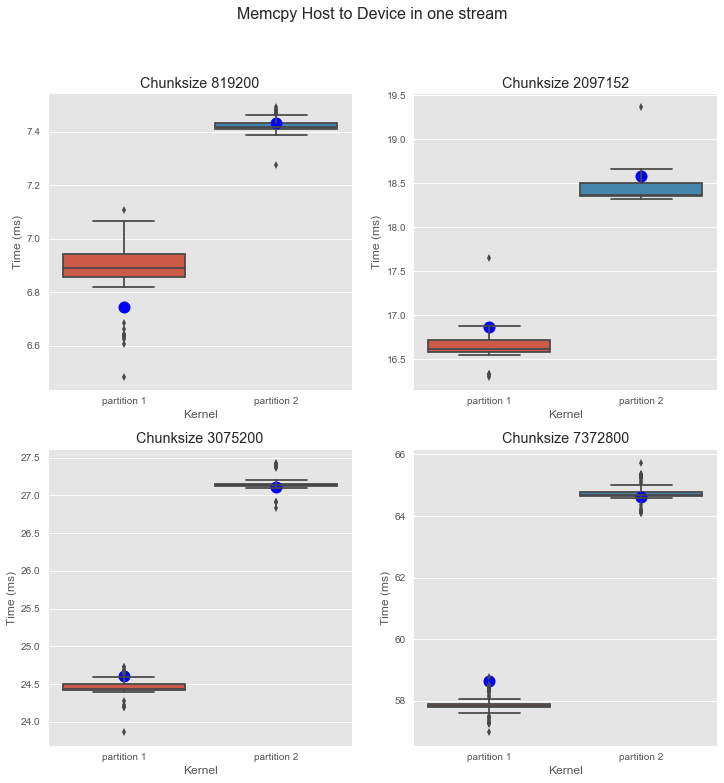

In [275]:
#mtest = pd.read_csv('./data/kerneltestdata/cpstmodel1960.csv', sep = ',')
mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1536resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

(1.4136564781820176, 2.3132560552069377)
1.38396416 0.029692318182 2.10039133554
2.26205216 0.0512038952069 2.21349880795
(3.5365513370073103, 5.7870840060119626)
3.47700384 0.0595474970073 1.68377301311
5.6832176 0.103866406012 1.79479692889
(5.1612548242152494, 8.4456897123522268)
5.0980032 0.0632516242152 1.22550864798
8.33357792 0.112111792352 1.32744389352
(12.300296779850186, 20.127758367027578)
12.12705024 0.17324653985 1.40847446977
19.83080768 0.296950687028 1.47532915297


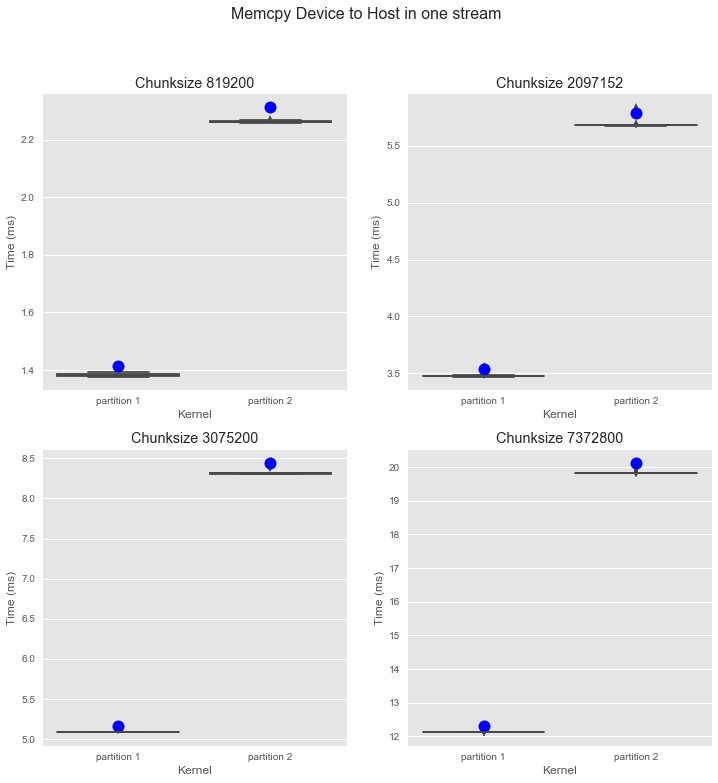

In [278]:
mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100
plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1536resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100
plt.subplot(222)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100
plt.subplot(223)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100
plt.subplot(224)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

In [240]:
mtest.head()

,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,2880,47775.744,0.691,233.136,238.119,7372800,199065600,66355200,54,18,partition 1,56.910240,161.252228,9.990880
1,2880,47775.744,0.691,233.136,238.119,7372800,199065600,66355200,54,18,partition 2,64.006401,161.440674,12.671904
2,2880,47775.744,0.436,233.564,238.596,7372800,199065600,66355200,54,18,partition 1,57.294815,161.206436,10.030784
3,2880,47775.744,0.436,233.564,238.596,7372800,199065600,66355200,54,18,partition 2,64.122589,161.249893,13.223648
4,2880,47775.744,0.577,233.996,238.985,7372800,199065600,66355200,54,18,partition 1,57.783329,161.256378,9.967264


Model 2 First partition 1 smaller
-------------------------------

(6.7448125243573891, 10.323692639322534)
6.87510176 -0.130289235643 -1.93169543515
10.235424 0.0882686393225 0.855010337932
(16.863310017361449, 25.811188802083851)
16.70391037 0.159399647361 0.945245311848
25.64492841 0.166260392084 0.644140776927
(24.607244246532527, 37.664149356937543)
24.37838051 0.228863736533 0.930066504967
37.52475982 0.139389536938 0.3700854508
(58.634543257711549, 89.746749884252381)
58.12979945 0.504743807712 0.860830117654
90.12911661 -0.382366725748 -0.426050777594


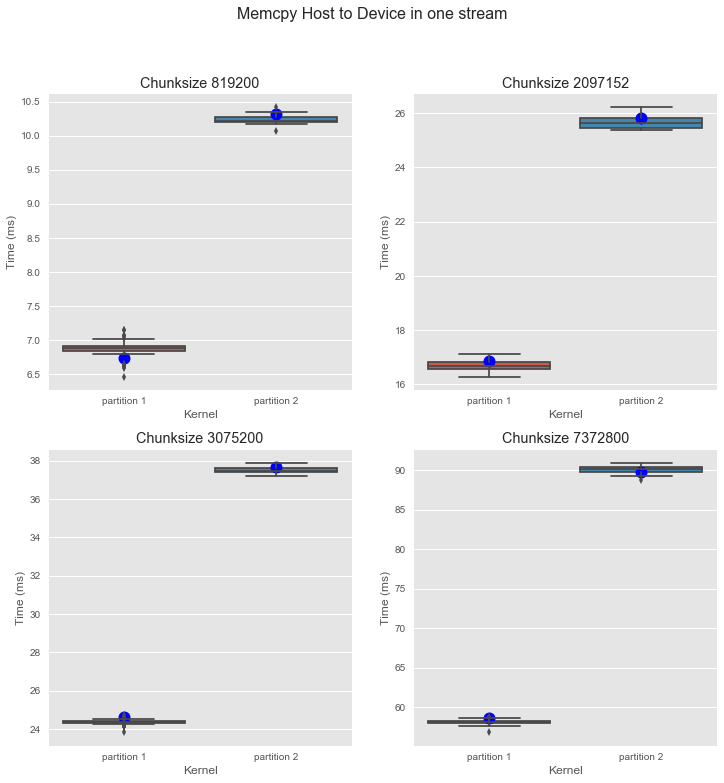

In [241]:
mtest = pd.read_csv('./data/kerneltestdata/model2stream_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,26,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/model2stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,26,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model2stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,26,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model2stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,26,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


(7.2355712393852336, 10.930743294498876)
7.07993344 0.155637799385 2.1510091496
10.99629696 -0.0655536655011 -0.599718278391
(17.450974612916763, 26.702050745902834)
17.13778725 0.313187362917 1.79466975263
26.65673758 0.0453131659028 0.169699197766
(25.269073288513159, 38.77221903878921)
25.04443659 0.224636698513 0.888978776342
38.85977232 -0.0875532812108 -0.225814470725
(59.622255206213595, 91.809243045288383)
59.25572542 0.366529786214 0.614753308049
91.86154825 -0.0523052047116 -0.0569716108931


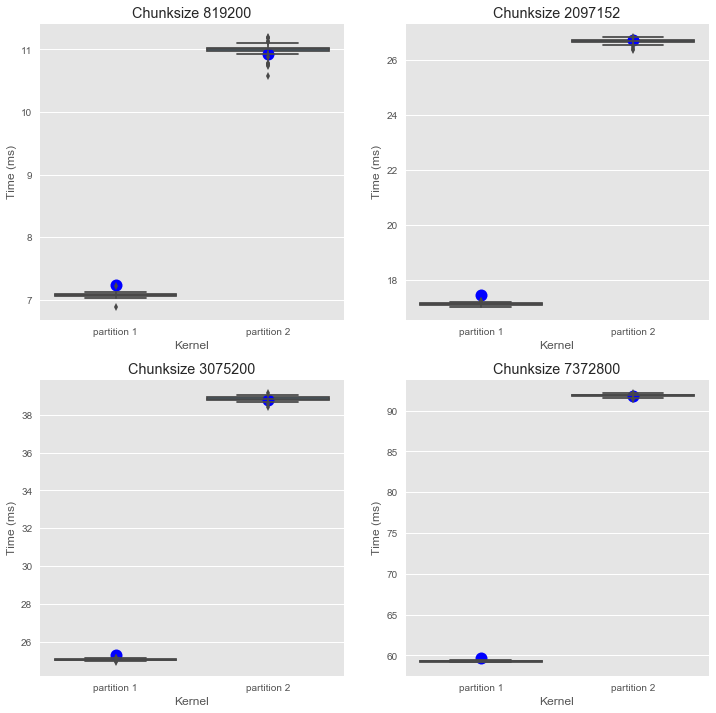

In [242]:
mtest = pd.read_csv('./data/kerneltestdata/model2sync_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,26,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/model2sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,26,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model2sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,26,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model2sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,26,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)




s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


model 3 partition 1 bigger than 2
---------------------------------

In [243]:
#if P1 matrix is larger than p2
def memtransfersyncm3(m,n,k,c):
    t1 = m*f1p(c)+n*fsync(c)+k*f1p(c)
    t2 = m*f1p(c)+(n)*fsync(c)
    return (t1,t2)

def memtransfersyncreturnm3(m,n,k,c):
    t1 = (m+n-1)*fsyncDtH(c)
    t2 = (n+k-1)*fsyncDtH(c)
    return (t1,t2)

def memtransferstreamm3(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)+k*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)
    return (t1,t2)

def memtransferstreamreturnm3(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n-1)*fsingleDtH(c)
    t2 = (n-1)*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

(11.092397964920679, 8.9122459127301816)
11.11372512 -0.0213271550793 -0.192268210596
8.69240736 0.21983855273 2.46670205112
(26.945758384406169, 21.47808112862203)
26.83907971 0.106678674406 0.395901547413
21.07262508 0.405456048622 1.88776663145
(39.078723825641006, 31.095022923957526)
39.06007931 0.018644515641 0.0477101445897
30.7706593 0.324363623958 1.04313678993
(92.391682167410366, 73.35242650704734)
92.30763174 0.0840504274103 0.0909718552998
72.84852468 0.503901827047 0.686959997157


,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,3840,47775.744,0.741,367.731,491.043,7372800,353894400,117964800,48,16,partition 1,92.037277,381.373291,17.632383
1,2880,47775.744,0.741,367.731,491.043,7372800,199065600,66355200,27,9,partition 2,72.703613,161.769821,9.946112
2,3840,47775.744,0.511,367.625,490.738,7372800,353894400,117964800,48,16,partition 1,92.430115,380.669464,17.638271
3,2880,47775.744,0.511,367.625,490.738,7372800,199065600,66355200,27,9,partition 2,73.003746,161.566437,9.942624
4,3840,47775.744,0.498,367.700,490.988,7372800,353894400,117964800,48,16,partition 1,92.302048,381.062286,17.623903


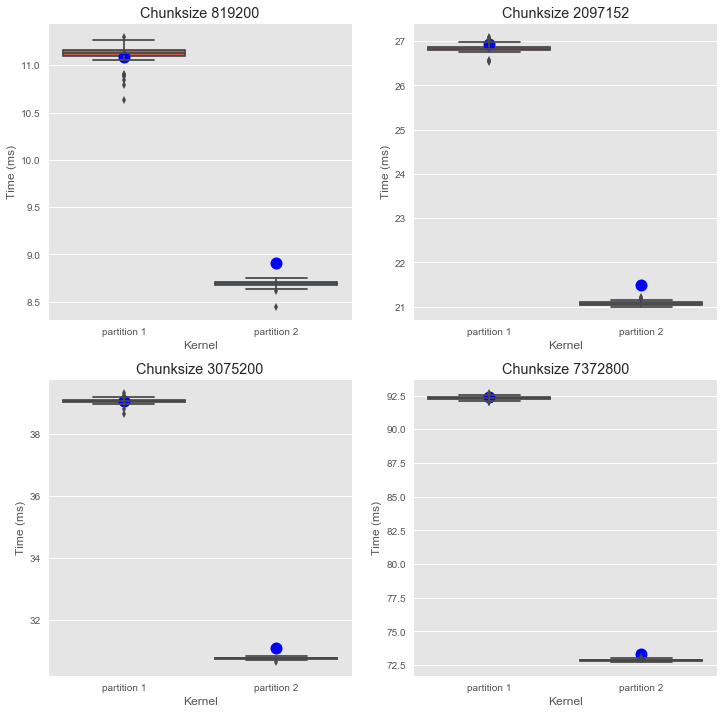

In [244]:
mtest = pd.read_csv('./data/kerneltestdata/model3sync_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncm3(5,54,16,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/model3sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncm3(5,54,16,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model3sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncm3(5,54,16,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model3sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncm3(5,54,16,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)




s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
mtest.head()

(10.323692639322534, 8.1213048762670592)
10.21305664 0.110635999323 1.07167079831
8.33701664 -0.215711763733 -2.65612197817
(25.811188802083848, 20.304801857639294)
25.84767876 -0.0364899579162 -0.141372635704
20.63318591 -0.328384052361 -1.617272873
(37.664149356937543, 29.629130827457534)
37.54794352 0.116205836938 0.308531691069
29.89930187 -0.270171042542 -0.911842619062
(89.746749884252367, 70.60077657561186)
90.82057662 -1.07382673575 -1.19650765864
71.88730036 -1.28652378439 -1.82225160514


,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,3840,47775.744,0.800,365.422,488.140,7372800,353894400,117964800,48,16,partition 1,89.950333,380.459412,17.729856
1,2880,47775.744,0.800,365.422,488.140,7372800,199065600,66355200,27,9,partition 2,71.180962,161.509689,10.014560
2,3840,47775.744,0.545,366.548,489.875,7372800,353894400,117964800,48,16,partition 1,90.859169,381.284851,17.731264
3,2880,47775.744,0.545,366.548,489.875,7372800,199065600,66355200,27,9,partition 2,71.717567,161.499878,10.002400
4,3840,47775.744,0.552,366.417,489.318,7372800,353894400,117964800,48,16,partition 1,90.666016,380.919159,17.733088


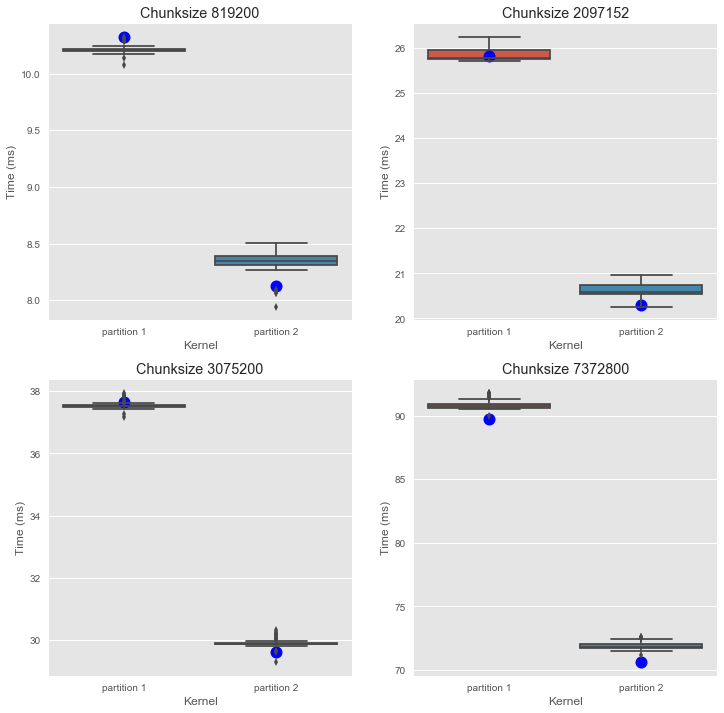

In [245]:
mtest = pd.read_csv('./data/kerneltestdata/model3stream_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamm3(5,54,16,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)




s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/model3stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamm3(5,54,16,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)




s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model3stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamm3(5,54,16,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)




s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/model3stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamm3(5,54,16,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100
plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)




s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
mtest.head()

In [246]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest #[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,3075200)

# #mt['HtDtime'].plot(kind = 'box')
# mt.boxplot(column='HtDtime',by='Kernel')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')
# plt.plot([2],[h[1]], marker = 'o',markersize=12, color='blue')


# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,3075200)
# print h
# print memtransfersyncreturn(6,6,6,3075200)


In [247]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,7372800)
# print h
# mt['HtDtime'].plot(kind = 'box')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,7372800)
# print h
# print memtransfersyncreturn(6,6,6,7372800)

In [248]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,819200)
# print h
# mt['HtDtime'].plot(kind = 'box')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,819200)
# print h
# print memtransfersyncreturn(6,6,6,819200)

In [249]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1024.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,819200)
# print h
# mt['HtDtime'].plot(kind = 'box')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,819200)
# print h
# print memtransfersyncreturn(6,6,6,819200)

At this point we're going to calculate a normalized overhead using our baseline
--------------------------------------------------------------------------

In [250]:
bl.columns = bl.columns.str.strip()
#bl.head()

In [251]:
# normalizeddf = dfsync.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# #normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)


In [252]:
# normalizeddf = dfsingle.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)

In [253]:
# normalizeddf = dfnosync.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)

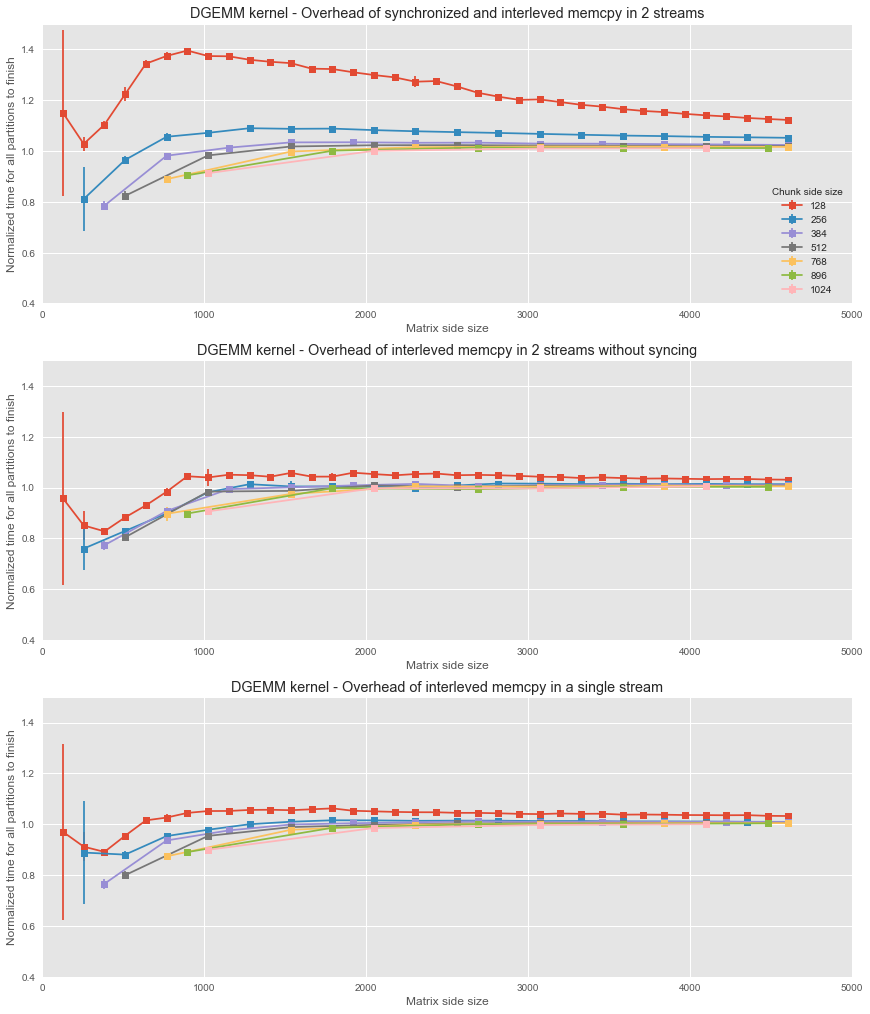

In [254]:
plt.figure(figsize=(12,14))
normalizeddf = dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

ANTT
----

In [255]:
bl = pd.read_csv('./data/kerneltestdata/baseline12sm.csv', sep = ',')
bl.columns = bl.columns.str.strip()


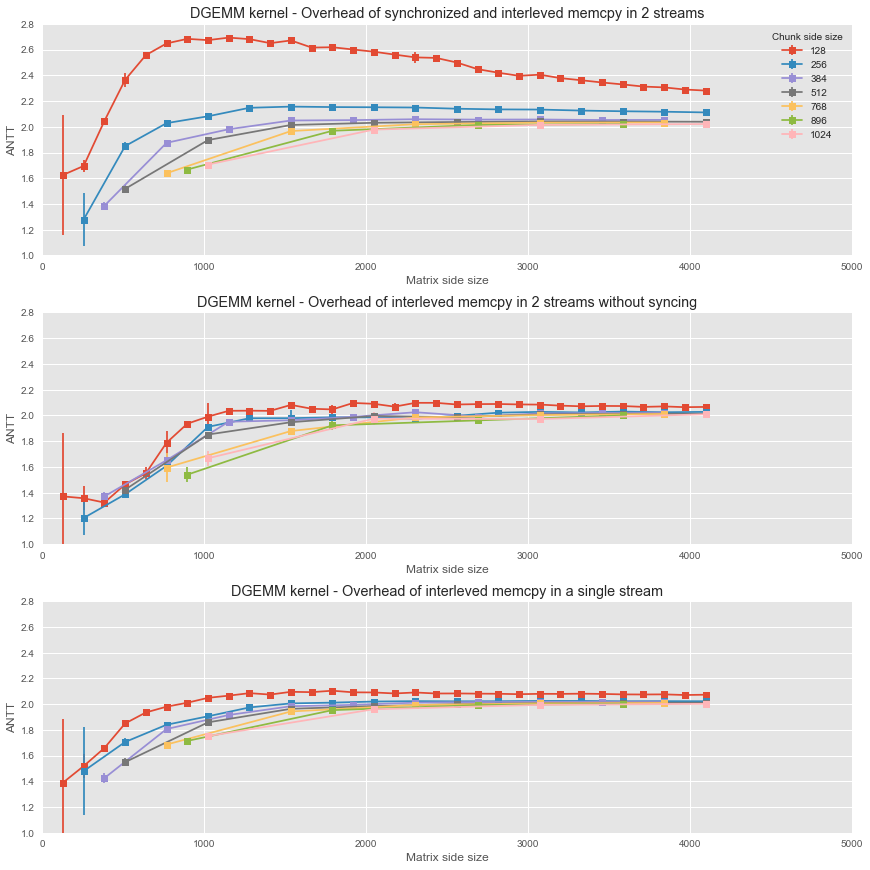

In [256]:
normalizeddf=dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')

plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(1,2.8)

plt.xlim(0,5000)

normalizeddf=dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(1,2.8)

plt.xlim(0,5000)

normalizeddf=dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(1,2.8)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)